In [ ]:
import numpy as np
import pandas as pd
from glob import glob # find files with same name
import xml.etree.ElementTree as xet #work with xml file
import cv2

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xml.etree.ElementTree as xet

def parsing(path):
    parser = xet.parse(path).getroot() #give xml file and read root <bndboox> <name> and ...
    fname = parser.find('filename').text
    parser_size = parser.find('size') #find size root
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)

    # Find all 'object' elements in image
    parser_objects = parser.findall('object')
    num_objects = len(parser_objects)

    # Lists to store object details for this image
    object_names = []
    xmin_list = []
    ymin_list = []
    xmax_list = []
    ymax_list = []

    # Iterate through each 'object' and extract information
    for obj in parser_objects:
        name = obj.find('name').text
        parser_bndbox = obj.find('bndbox')
        xmin = int(parser_bndbox.find('xmin').text)
        ymin = int(parser_bndbox.find('ymin').text)
        xmax = int(parser_bndbox.find('xmax').text)
        ymax = int(parser_bndbox.find('ymax').text)

        # Append values to lists
        object_names.append(name)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)

    # Return details of all objects in the image
    return num_objects, fname, width, height, object_names, xmin_list, ymin_list, xmax_list, ymax_list



In [ ]:
import os

extract all file and create a table

In [ ]:
import os
import pandas as pd

# Initialize lists to store object details
w = []
h = []
n = []
xmin = []
ymin = []
xmax = []
ymax = []
fname = []

# Iterate through all XML files in the directory
path = '/content/drive/MyDrive/Steel_2/NEU-DET/train/annotations'  # مشخص کردن مسیر

for i in os.listdir(path):
    file_path = os.path.join(path, i)

    # Call parsing function to get details for each file
    num_objects, Fname, width, height, names, Xmin, Ymin, Xmax, Ymax = parsing(file_path)

    # Append the general file details (filename, width, height) and object details for each object
    for obj in range(num_objects):
        w.append(width)
        h.append(height)
        fname.append(Fname)
        n.append(names[obj])  # Name of each object
        xmin.append(Xmin[obj])  # xmin for each object
        ymin.append(Ymin[obj])  # ymin for each object
        xmax.append(Xmax[obj])  # xmax for each object
        ymax.append(Ymax[obj])  # ymax for each object

# Create a DataFrame from the lists
df = pd.DataFrame({
    'Filename': fname,
    'width': w,
    'height': h,
    'ObjectName': n,
    'xmin': xmin,
    'ymin': ymin,
    'xmax': xmax,
    'ymax': ymax
})

# Show the first few rows of the DataFrame
print(df.head())



           Filename  width  height ObjectName  xmin  ymin  xmax  ymax
0  inclusion_63.jpg    200     200  inclusion   143    41   168   116
1  inclusion_63.jpg    200     200  inclusion   147   108   164   179
2  inclusion_64.jpg    200     200  inclusion   112     1   136    70
3  inclusion_64.jpg    200     200  inclusion   106    91   138   198
4  inclusion_65.jpg    200     200  inclusion    30     1    57    82


In [ ]:
df

Filename  width  height ObjectName  xmin  ymin  xmax  ymax
0     inclusion_63.jpg    200     200  inclusion   143    41   168   116
1     inclusion_63.jpg    200     200  inclusion   147   108   164   179
2     inclusion_64.jpg    200     200  inclusion   112     1   136    70
3     inclusion_64.jpg    200     200  inclusion   106    91   138   198
4     inclusion_65.jpg    200     200  inclusion    30     1    57    82
...                ...    ...     ...        ...   ...   ...   ...   ...
3327  inclusion_62.jpg    200     200  inclusion     1    66    33   199
3328  inclusion_62.jpg    200     200  inclusion    39    77    59   140
3329  inclusion_62.jpg    200     200  inclusion   169     1   182    32
3330  inclusion_62.jpg    200     200  inclusion    39    77    59   140
3331  inclusion_62.jpg    200     200  inclusion    46   116    59   146

[3332 rows x 8 columns]

In [ ]:
df.head(50)

Filename  width  height ObjectName  xmin  ymin  xmax  ymax
0   inclusion_63.jpg    200     200  inclusion   143    41   168   116
1   inclusion_63.jpg    200     200  inclusion   147   108   164   179
2   inclusion_64.jpg    200     200  inclusion   112     1   136    70
3   inclusion_64.jpg    200     200  inclusion   106    91   138   198
4   inclusion_65.jpg    200     200  inclusion    30     1    57    82
5   inclusion_65.jpg    200     200  inclusion   147    20   191   198
6   inclusion_65.jpg    200     200  inclusion    27   108    48   145
7   inclusion_66.jpg    200     200  inclusion    64     1   108   197
8   inclusion_67.jpg    200     200  inclusion    71    31    97    92
9   inclusion_67.jpg    200     200  inclusion   126     1   151    73
10  inclusion_67.jpg    200     200  inclusion    17   116    39   193
11  inclusion_67.jpg    200     200  inclusion   132   166   155   200
12  inclusion_68.jpg    200     200  inclusion    92   109   118   161
13  inclusion_68.jpg    200     200  inclusion   154     6   171    66
14  inclusion_69.jpg    200     200  inclusion    30    30    52    98
15  inclusion_69.jpg    200     200  inclusion    37   116    56   167
16  inclusion_69.jpg    200     200  inclusion   141    71   165   146
17   inclusion_7.jpg    200     200  inclusion     9    56   147    83
18   inclusion_7.jpg    200     200  inclusion   151    61   183    75
19  inclusion_70.jpg    200     200  inclusion    87    46   117   116
20  inclusion_70.jpg    200     200  inclusion    86   127   106   179
21  inclusion_70.jpg    200     200  inclusion    24     5    73   179
22  inclusion_71.jpg    200     200  inclusion    76    73   114   158
23  inclusion_71.jpg    200     200  inclusion   110    66   136   112
24  inclusion_72.jpg    200     200  inclusion    92    40   125   113
25  inclusion_73.jpg    200     200  inclusion    75     1   108   129
26  inclusion_73.jpg    200     200  inclusion   127   109   157   180
27  inclusion_74.jpg    200     200  inclusion    85     1   116   196
28  inclusion_74.jpg    200     200  inclusion   121     2   144    88
29  inclusion_74.jpg    200     200  inclusion   147    18   167    50
30  inclusion_75.jpg    200     200  inclusion     7     2    40   197
31  inclusion_75.jpg    200     200  inclusion    43    76    67   164
32  inclusion_75.jpg    200     200  inclusion   115    23   133    78
33  inclusion_75.jpg    200     200  inclusion    69    97    89   127
34  inclusion_76.jpg    200     200  inclusion    80     1   128   198
35  inclusion_76.jpg    200     200  inclusion   130   115   155   194
36  inclusion_76.jpg    200     200  inclusion   158   135   174   164
37  inclusion_77.jpg    200     200  inclusion    77    69   123   198
38  inclusion_78.jpg    200     200  inclusion   107     1   141    75
39  inclusion_78.jpg    200     200  inclusion    99   139   131   199
40  inclusion_78.jpg    200     200  inclusion     2    49    29    99
41  inclusion_79.jpg    200     200  inclusion    17     6    65   196
42   inclusion_8.jpg    200     200  inclusion    23   143    52   160
43   inclusion_8.jpg    200     200  inclusion    65   132   198   164
44  inclusion_80.jpg    200     200  inclusion    34    65    73   197
45  inclusion_80.jpg    200     200  inclusion   131    11   160   132
46  inclusion_80.jpg    200     200  inclusion   157    68   198   197
47  inclusion_81.jpg    200     200  inclusion    45     1    90   199
48  inclusion_81.jpg    200     200  inclusion   159     1   188    96
49  inclusion_81.jpg    200     200  inclusion   136   132   170   198

In [ ]:
df.to_csv("label", sep=' ', encoding='utf-8', index= False)

#calculate center of box and h and w of box and normalize

In [ ]:
df['center_x']=(df['xmin']+df['xmax'])/(2*df['width'])

In [ ]:
df['center_y']=(df['ymin']+df['ymax'])/(2*df['height'])

In [ ]:
df['bb_width'] = (df['xmax']-df['xmin'])/df['width']

In [ ]:
df['bb_height'] = (df["ymax"]-df['ymin'])/df['height']

In [ ]:
df.head(10)

Filename  width  height ObjectName  xmin  ymin  xmax  ymax  \
0  inclusion_63.jpg    200     200  inclusion   147   108   164   179   
1  inclusion_63.jpg    200     200  inclusion   147   108   164   179   
2  inclusion_64.jpg    200     200  inclusion   106    91   138   198   
3  inclusion_64.jpg    200     200  inclusion   106    91   138   198   
4  inclusion_65.jpg    200     200  inclusion    27   108    48   145   
5  inclusion_65.jpg    200     200  inclusion    27   108    48   145   
6  inclusion_65.jpg    200     200  inclusion    27   108    48   145   
7  inclusion_66.jpg    200     200  inclusion    64     1   108   197   
8  inclusion_67.jpg    200     200  inclusion   132   166   155   200   
9  inclusion_67.jpg    200     200  inclusion   132   166   155   200   

   center_x  center_y  bb_width  bb_height  
0    0.7775    0.7175     0.085      0.355  
1    0.7775    0.7175     0.085      0.355  
2    0.6100    0.7225     0.160      0.535  
3    0.6100    0.7225     0.160      0.535  
4    0.1875    0.6325     0.105      0.185  
5    0.1875    0.6325     0.105      0.185  
6    0.1875    0.6325     0.105      0.185  
7    0.4300    0.4950     0.220      0.980  
8    0.7175    0.9150     0.115      0.170  
9    0.7175    0.9150     0.115      0.170

In [ ]:
import os
import shutil

In [ ]:
os.makedirs('/content/drive/MyDrive/Steel_2/validation')

In [ ]:
crazing = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/crazing")
inclusion = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/inclusion")
patches = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/patches")
pitted_surface = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/pitted_surface")
rolled_in_scale = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/rolled-in_scale")
scratches = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/scratches")

for i in range(len(crazing)):
  file_name = crazing[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/crazing",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")



In [ ]:
for i in range(len(inclusion)):
  file_name = inclusion[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/inclusion",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")

In [ ]:
for i in range(len(patches)):
  file_name = patches[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/patches",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")

In [ ]:
for i in range(len(pitted_surface)):
  file_name = pitted_surface[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/pitted_surface",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")

In [ ]:
for i in range(len(rolled_in_scale)):
  file_name = rolled_in_scale[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/rolled-in_scale",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")

In [ ]:
for i in range(len(scratches)):
  file_name = scratches[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/scratches",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/train")

In [ ]:
num = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/train/images/crazing")[0]
print(num)

crazing_1.jpg


class id, centerx, center y, bb width, bb height

In [ ]:
df

Filename  width  height ObjectName  xmin  ymin  xmax  ymax  \
0     inclusion_63.jpg    200     200  inclusion   143    41   168   116   
1     inclusion_63.jpg    200     200  inclusion   147   108   164   179   
2     inclusion_64.jpg    200     200  inclusion   112     1   136    70   
3     inclusion_64.jpg    200     200  inclusion   106    91   138   198   
4     inclusion_65.jpg    200     200  inclusion    30     1    57    82   
...                ...    ...     ...        ...   ...   ...   ...   ...   
3327  inclusion_62.jpg    200     200  inclusion     1    66    33   199   
3328  inclusion_62.jpg    200     200  inclusion    39    77    59   140   
3329  inclusion_62.jpg    200     200  inclusion   169     1   182    32   
3330  inclusion_62.jpg    200     200  inclusion    39    77    59   140   
3331  inclusion_62.jpg    200     200  inclusion    46   116    59   146   

      center_x  center_y  bb_width  bb_height  
0       0.7775    0.3925     0.125      0.375  
1       0.7775    0.7175     0.085      0.355  
2       0.6200    0.1775     0.120      0.345  
3       0.6100    0.7225     0.160      0.535  
4       0.2175    0.2075     0.135      0.405  
...        ...       ...       ...        ...  
3327    0.0850    0.6625     0.160      0.665  
3328    0.2450    0.5425     0.100      0.315  
3329    0.8775    0.0825     0.065      0.155  
3330    0.2450    0.5425     0.100      0.315  
3331    0.2625    0.6550     0.065      0.150  

[3332 rows x 12 columns]

convert to .txt file for yolo format

In [ ]:
import os

# convert name of class to number with dictionary
class_dict = {
    "crazing": 0,
    "inclusion": 1,
    "patches": 2,
    "pitted_surface": 3,
    "rolled-in_scale": 4,
    "scratches": 5
}
#yolo can learn number
train_folder = '/content/drive/MyDrive/Steel_2/train'

# create group for all object in image
grouped = df.groupby('Filename')

for fname, group in grouped: # group : all of row for a image in dataframe
    # name of image
    txt_name = fname.split('.')[0]
    dest_label_file = os.path.join(train_folder, txt_name + ".txt")


    with open(dest_label_file, mode='w') as f:
        for _, row in group.iterrows():
            # Access the 'ObjectName' column instead of 'class'
            class_number = class_dict.get(row['ObjectName'], -1)  # find class number if none == -1

            # w and h
            width, height = row['width'], row['height']

            # x and y
            xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
            print(f"Image: {fname}, Object: {row['ObjectName']}, xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

            # Normalize
            center_x = (xmin + xmax) / (2 * width)
            center_y = (ymin + ymax) / (2 * height)
            bb_width = (xmax - xmin) / width
            bb_height = (ymax - ymin) / height

            # write txt file
            label_txt = f"{class_number} {center_x} {center_y} {bb_width} {bb_height}\n"
            f.write(label_txt)



Image: crazing_1.jpg, Object: crazing, xmin: 2, ymin: 2, xmax: 193, ymax: 194
Image: crazing_10.jpg, Object: crazing, xmin: 60, ymin: 20, xmax: 194, ymax: 69
Image: crazing_10.jpg, Object: crazing, xmin: 9, ymin: 84, xmax: 197, ymax: 198
Image: crazing_100.jpg, Object: crazing, xmin: 1, ymin: 10, xmax: 108, ymax: 121
Image: crazing_100.jpg, Object: crazing, xmin: 35, ymin: 1, xmax: 200, ymax: 83
Image: crazing_100.jpg, Object: crazing, xmin: 120, ymin: 109, xmax: 196, ymax: 198
Image: crazing_100.jpg, Object: crazing, xmin: 8, ymin: 112, xmax: 164, ymax: 190
Image: crazing_101.jpg, Object: crazing, xmin: 40, ymin: 12, xmax: 187, ymax: 152
Image: crazing_102.jpg, Object: crazing, xmin: 2, ymin: 2, xmax: 144, ymax: 153
Image: crazing_102.jpg, Object: crazing, xmin: 150, ymin: 85, xmax: 199, ymax: 178
Image: crazing_103.jpg, Object: crazing, xmin: 1, ymin: 18, xmax: 130, ymax: 99
Image: crazing_103.jpg, Object: crazing, xmin: 126, ymin: 29, xmax: 198, ymax: 130
Image: crazing_103.jpg, Obj

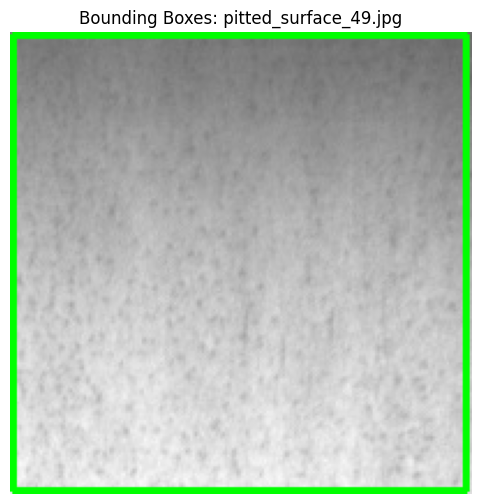

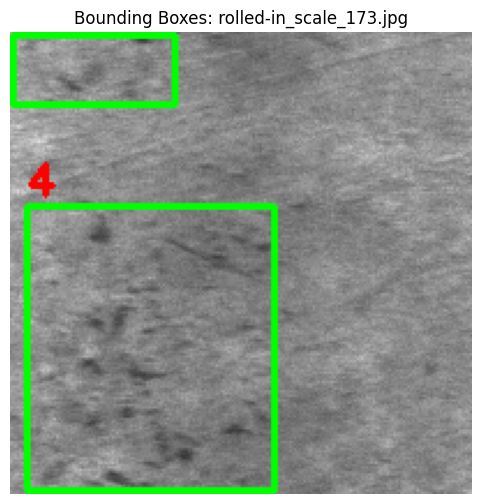

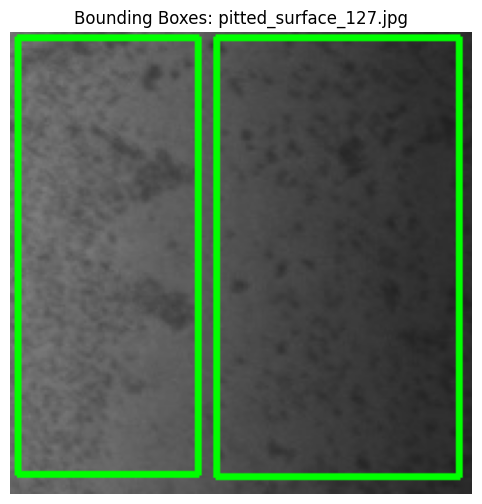

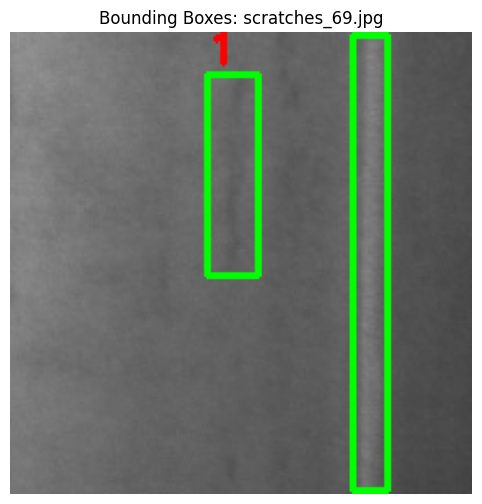

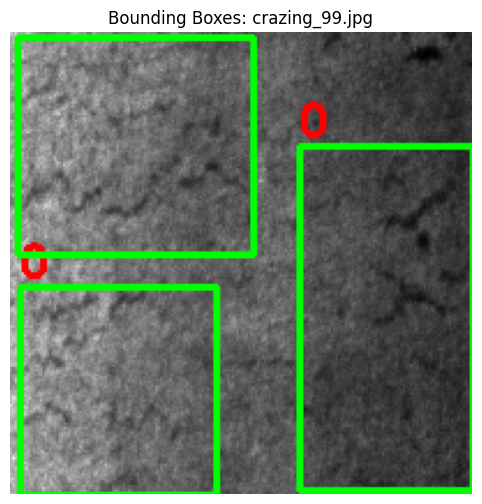

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt


data_dir = '/content/drive/MyDrive/Steel_2/train'


image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))]
sample_images = random.sample(image_files, 5)

def draw_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    if not os.path.exists(label_path):
        print( {os.path.basename(image_path)})
        return img

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    return img


for img_file in sample_images:
    img_path = os.path.join(data_dir, img_file)
    label_path = os.path.join(data_dir, os.path.splitext(img_file)[0] + '.txt')

    img = draw_boxes(img_path, label_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f'Bounding Boxes: {img_file}')
    plt.axis('off')
    plt.show()


Validation

In [ ]:
import os
import pandas as pd

# Initialize lists to store object details
w = []
h = []
n = []
xmin = []
ymin = []
xmax = []
ymax = []
fname = []

# Iterate through all XML files in the directory
path = '/content/drive/MyDrive/Steel_2/NEU-DET/validation/annotations'  # مشخص کردن مسیر

for i in os.listdir(path):
    file_path = os.path.join(path, i)

    # Call parsing function to get details for each file
    num_objects, Fname, width, height, names, Xmin, Ymin, Xmax, Ymax = parsing(file_path)

    # Append the general file details (filename, width, height) and object details for each object
    for obj in range(num_objects):
        w.append(width)
        h.append(height)
        fname.append(Fname)
        n.append(names[obj])  # Name of each object
        xmin.append(Xmin[obj])  # xmin for each object
        ymin.append(Ymin[obj])  # ymin for each object
        xmax.append(Xmax[obj])  # xmax for each object
        ymax.append(Ymax[obj])  # ymax for each object

# Create a DataFrame from the lists
df = pd.DataFrame({
    'Filename': fname,
    'width': w,
    'height': h,
    'ObjectName': n,
    'xmin': xmin,
    'ymin': ymin,
    'xmax': xmax,
    'ymax': ymax
})

# Show the first few rows of the DataFrame
print(df.head())

          Filename  width  height ObjectName  xmin  ymin  xmax  ymax
0  crazing_240.jpg    200     200    crazing    12     2   176    58
1  crazing_240.jpg    200     200    crazing    71    84   200   172
2  crazing_240.jpg    200     200    crazing    47   140   200   200
3  crazing_241.jpg    200     200    crazing    42   124   183   184
4  crazing_241.jpg    200     200    crazing    38     9   188    84


In [ ]:
import os

# دیکشنری برای تبدیل نام کلاس به عدد
class_dict = {
    "crazing": 0,
    "inclusion": 1,
    "patches": 2,
    "pitted_surface": 3,
    "rolled-in_scale": 4,
    "scratches": 5
}

train_folder = '/content/drive/MyDrive/Steel_2/validation'

# فرض بر این است که df DataFrame شما با اطلاعات باندینگ باکس‌ها پر شده باشد
grouped = df.groupby('Filename')

for fname, group in grouped:
    # نام فایل متنی
    txt_name = fname.split('.')[0]
    dest_label_file = os.path.join(train_folder, txt_name + ".txt")

    # ایجاد فایل txt و نوشتن اطلاعات باندینگ باکس‌ها
    with open(dest_label_file, mode='w') as f:
        for _, row in group.iterrows():
            # Access the 'ObjectName' column instead of 'class'
            class_number = class_dict.get(row['ObjectName'], -1)  # اگر نام کلاس پیدا نشد، -1 باز می‌گرداند

            # ابعاد تصویر
            width, height = row['width'], row['height']

            # مختصات باندینگ باکس برای هر شیء
            xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
            print(f"Image: {fname}, Object: {row['ObjectName']}, xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")  # چاپ مختصات برای بررسی

            # نرمال‌سازی مختصات باندینگ باکس برای هر ابجکت
            center_x = (xmin + xmax) / 2 / width
            center_y = (ymin + ymax) / 2 / height
            bb_width = (xmax - xmin) / width
            bb_height = (ymax - ymin) / height

            # نوشتن اطلاعات باندینگ باکس در فایل
            label_txt = f"{class_number} {center_x} {center_y} {bb_width} {bb_height}\n"
            f.write(label_txt)


Image: crazing_240.jpg, Object: crazing, xmin: 12, ymin: 2, xmax: 176, ymax: 58
Image: crazing_240.jpg, Object: crazing, xmin: 71, ymin: 84, xmax: 200, ymax: 172
Image: crazing_240.jpg, Object: crazing, xmin: 47, ymin: 140, xmax: 200, ymax: 200
Image: crazing_241.jpg, Object: crazing, xmin: 42, ymin: 124, xmax: 183, ymax: 184
Image: crazing_241.jpg, Object: crazing, xmin: 38, ymin: 9, xmax: 188, ymax: 84
Image: crazing_241.jpg, Object: crazing, xmin: 1, ymin: 65, xmax: 172, ymax: 156
Image: crazing_242.jpg, Object: crazing, xmin: 36, ymin: 4, xmax: 184, ymax: 55
Image: crazing_242.jpg, Object: crazing, xmin: 64, ymin: 76, xmax: 181, ymax: 168
Image: crazing_242.jpg, Object: crazing, xmin: 17, ymin: 128, xmax: 196, ymax: 199
Image: crazing_243.jpg, Object: crazing, xmin: 9, ymin: 143, xmax: 115, ymax: 198
Image: crazing_243.jpg, Object: crazing, xmin: 1, ymin: 38, xmax: 93, ymax: 127
Image: crazing_243.jpg, Object: crazing, xmin: 112, ymin: 47, xmax: 187, ymax: 142
Image: crazing_243.jp

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Steel_2/validation.zip','r') as ziprefer:
  ziprefer.extractall('/content/drive/MyDrive/Steel_2')

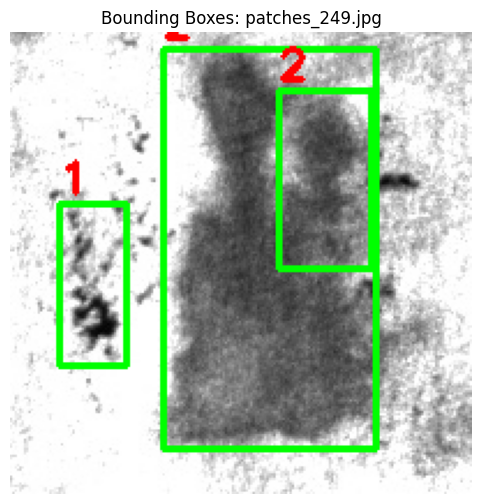

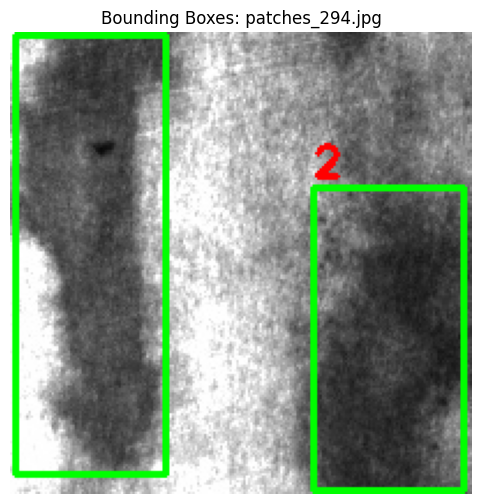

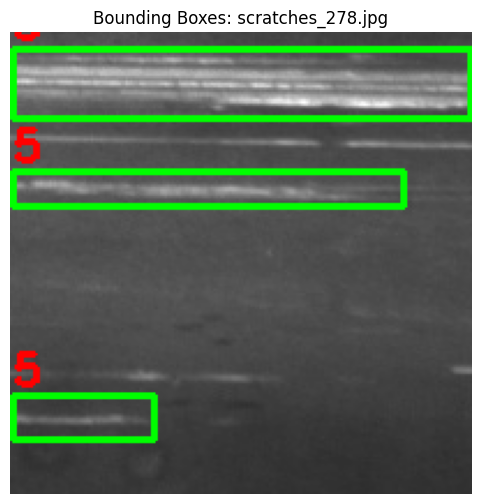

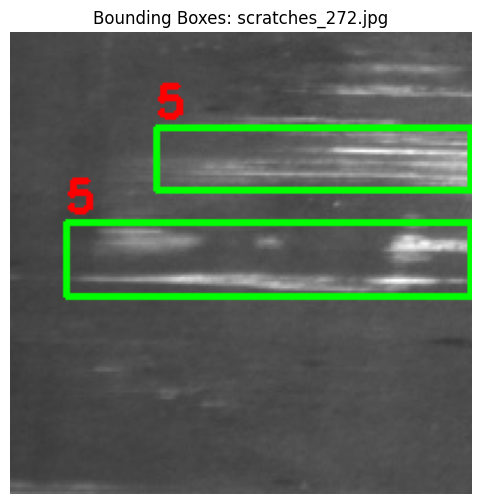

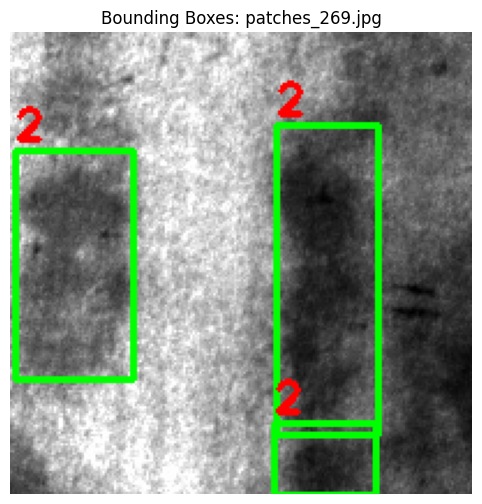

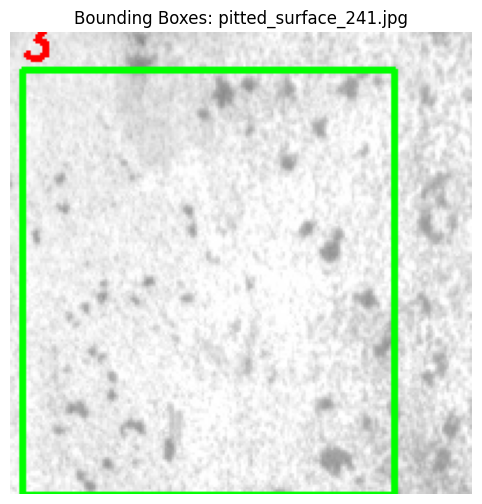

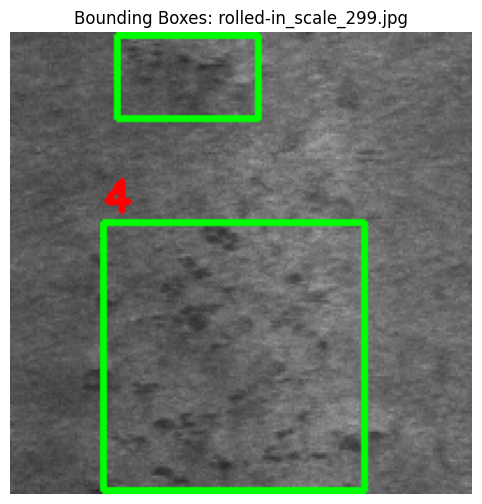

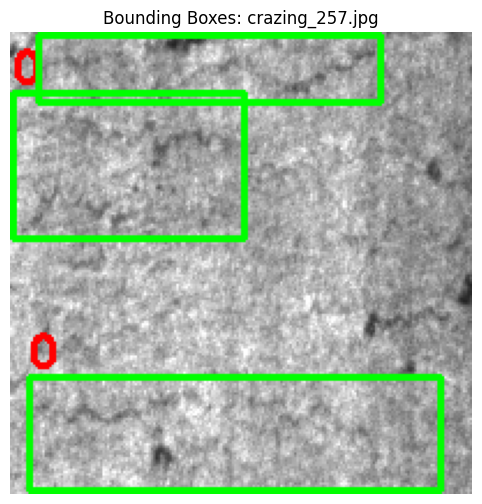

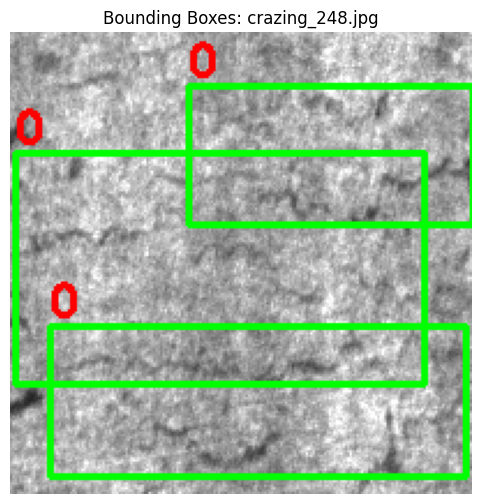

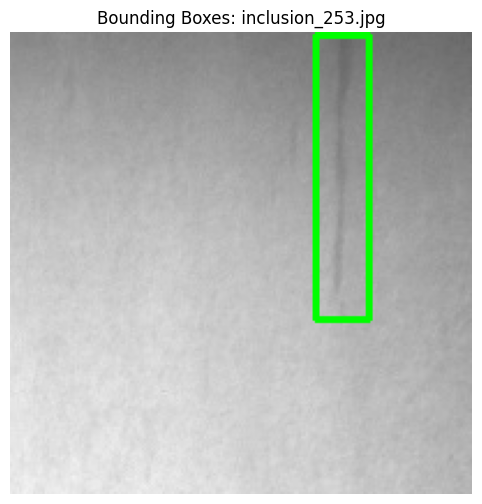

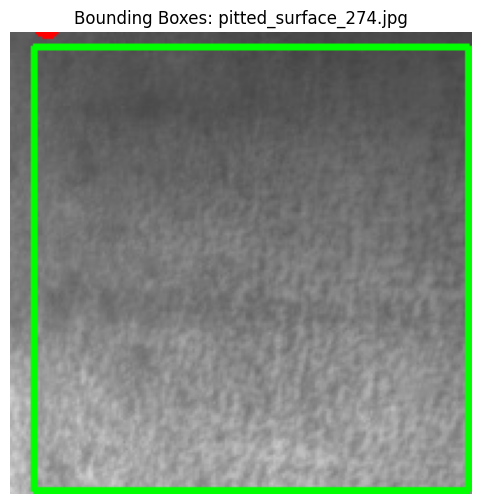

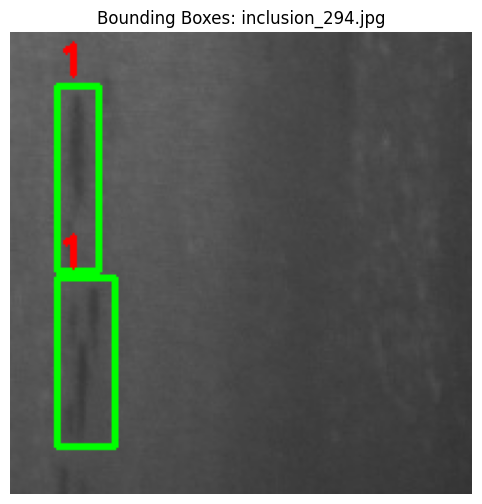

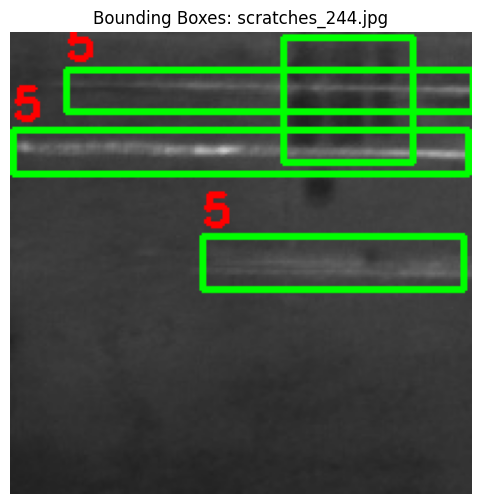

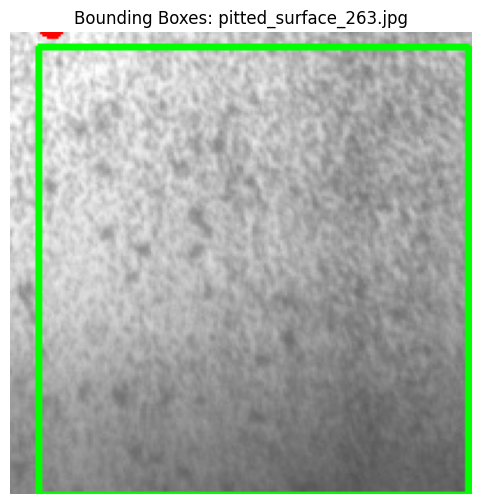

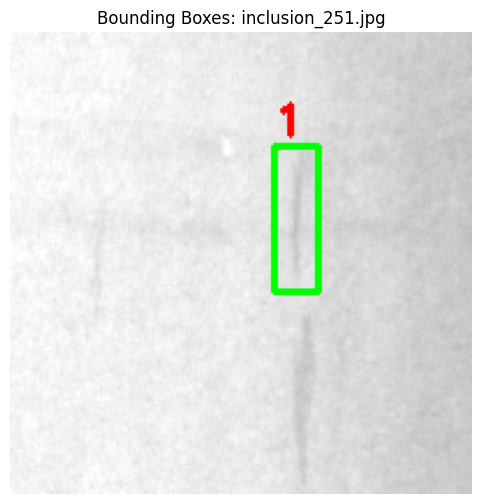

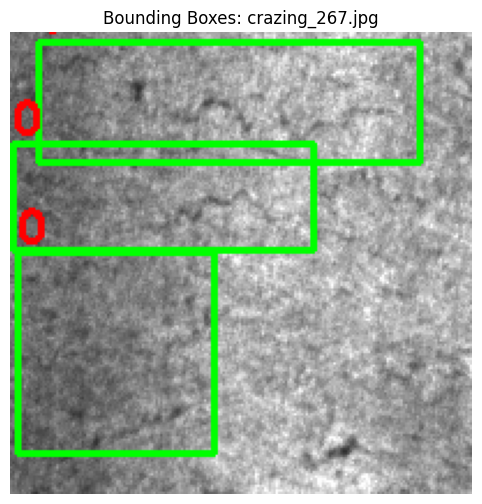

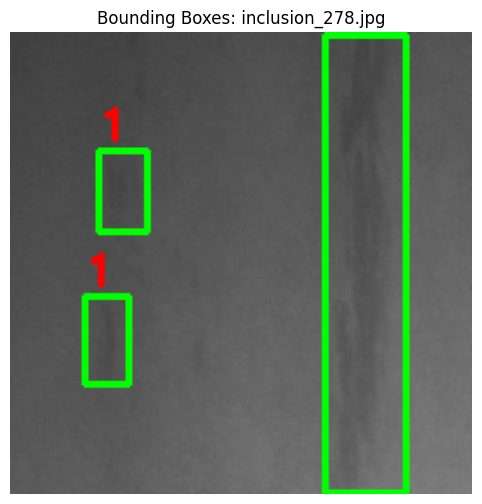

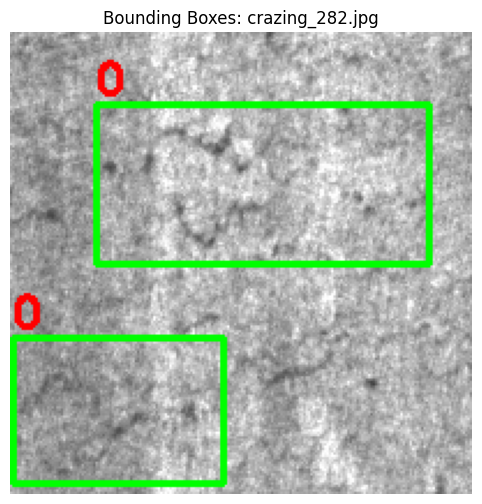

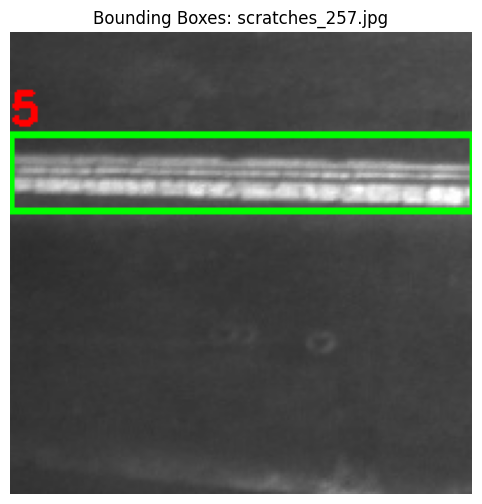

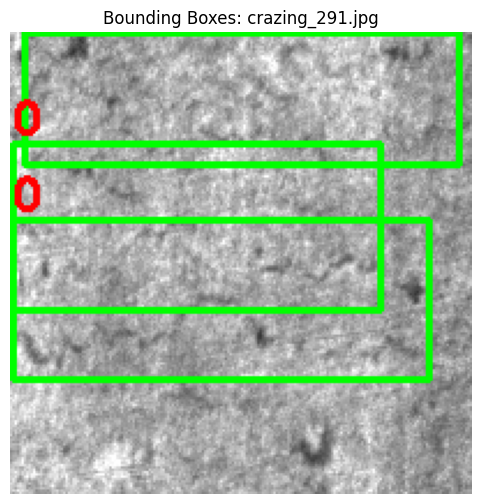

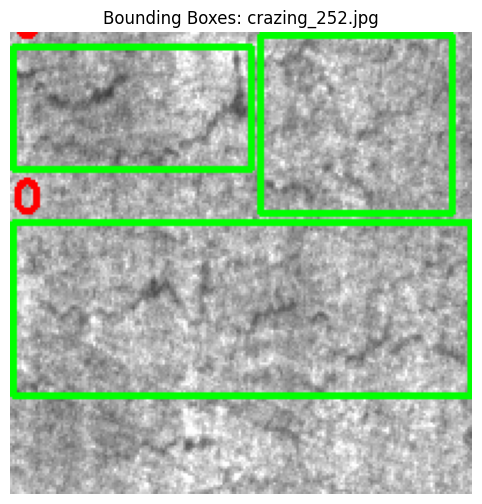

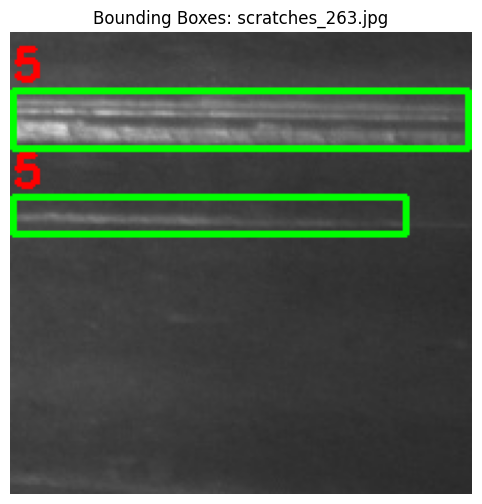

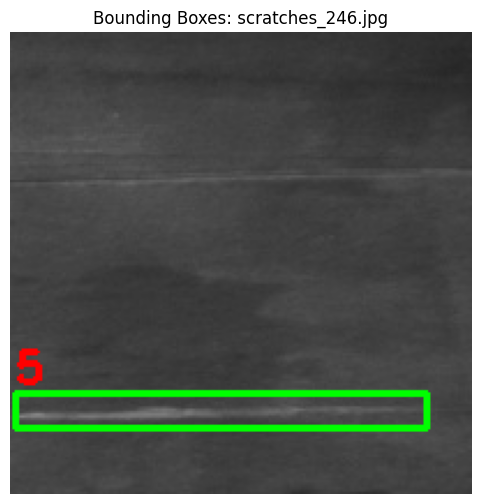

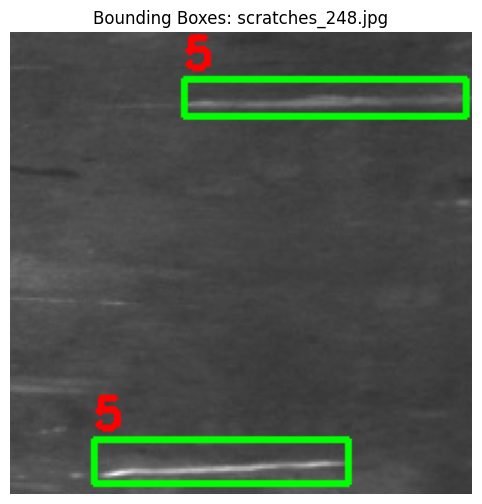

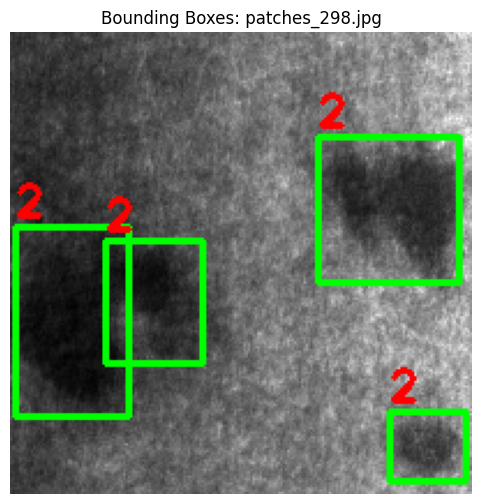

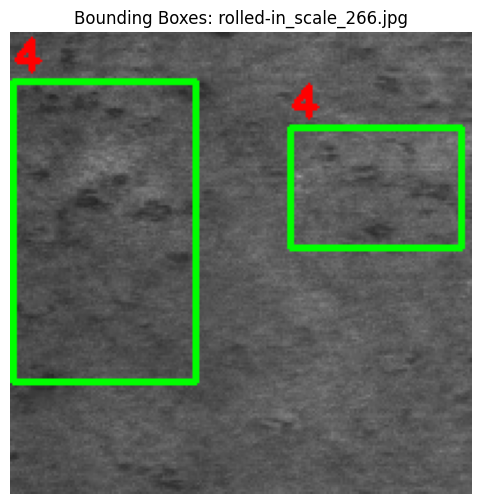

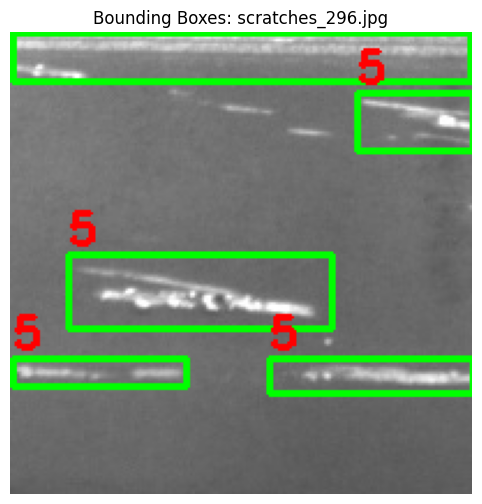

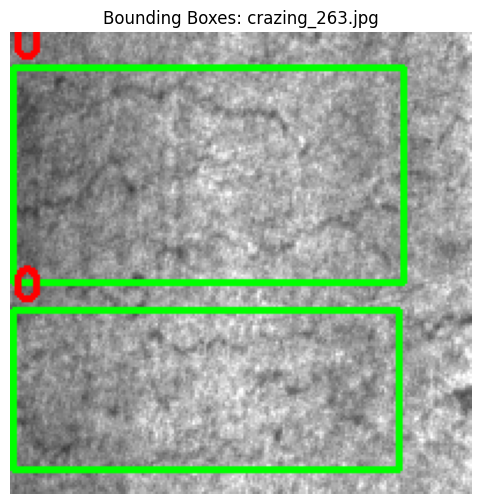

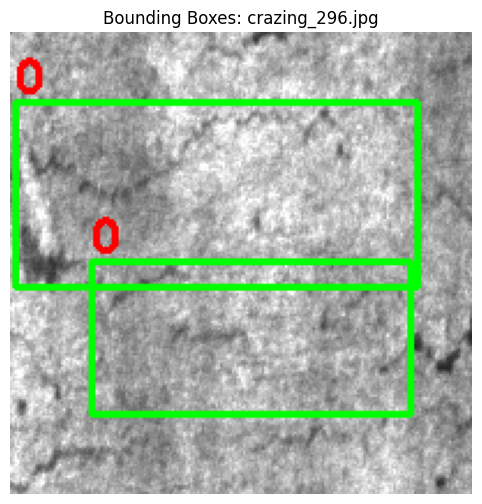

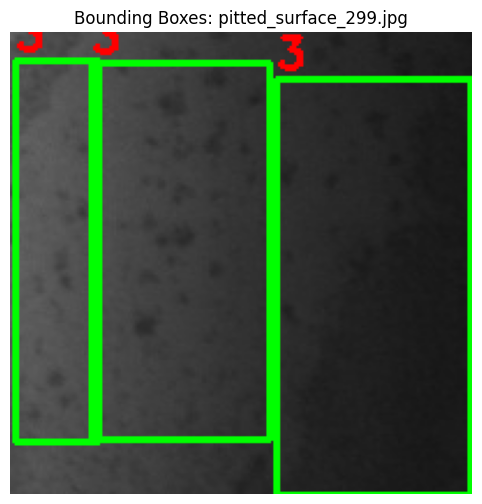

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# مسیر پوشه‌ای که هم تصاویر هست هم فایل‌های label (با فرمت YOLO)
data_dir = '/content/drive/MyDrive/Steel_2/validation'  # اینو با مسیر واقعی پوشه عوض کن

# گرفتن لیست تصاویر (jpg یا png)
image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))]
sample_images = random.sample(image_files, 30)  # نمایش ۵ تصویر به صورت تصادفی

def draw_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    if not os.path.exists(label_path):
        print(f"❌ لیبل پیدا نشد برای: {os.path.basename(image_path)}")
        return img

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    return img

# نمایش تصاویر با matplotlib
for img_file in sample_images:
    img_path = os.path.join(data_dir, img_file)
    label_path = os.path.join(data_dir, os.path.splitext(img_file)[0] + '.txt')

    img = draw_boxes(img_path, label_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f'Bounding Boxes: {img_file}')
    plt.axis('off')
    plt.show()

In [ ]:
df_val = pd.DataFrame({
    'fname':fname,
    'name': n,
    'width': w,
    'height': h,
    'xmin': xmin,
    'ymin': ymin,
    'xmax': xmax,
    'ymax': ymax
})

In [ ]:
df_val.to_csv("label_val", sep=' ', encoding='utf-8', index= False)

In [ ]:
df_val['center_x']=(df_val['xmin']+df_val['xmax'])/(2*df_val['width'])

In [ ]:
df_val['center_y']=(df_val['ymin']+df_val['ymax'])/(2*df_val['height'])
df_val['bb_width'] = (df_val['xmax']-df_val['xmin'])/df_val['width']
df_val['bb_height'] = (df_val["ymax"]-df_val['ymin'])/df_val['height']

In [ ]:
df_val

fname       name  width  height  xmin  ymin  xmax  ymax  \
0      crazing_240.jpg    crazing    200     200    12     2   176    58   
1      crazing_241.jpg    crazing    200     200    42   124   183   184   
2      crazing_242.jpg    crazing    200     200    36     4   184    55   
3      crazing_243.jpg    crazing    200     200     9   143   115   198   
4      crazing_244.jpg    crazing    200     200     1    57   192   122   
..                 ...        ...    ...     ...   ...   ...   ...   ...   
356  scratches_296.jpg  scratches    200     200    25    96   139   128   
357  scratches_297.jpg  scratches    200     200   132   122   199   138   
358  scratches_298.jpg  scratches    200     200     6     7   199    44   
359  scratches_299.jpg  scratches    200     200     2   135   200   186   
360  scratches_300.jpg  scratches    200     200    88     1   200    34   

     center_x  center_y  bb_width  bb_height  
0      0.4700    0.1500     0.820      0.280  
1      0.5625    0.7700     0.705      0.300  
2      0.5500    0.1475     0.740      0.255  
3      0.3100    0.8525     0.530      0.275  
4      0.4825    0.4475     0.955      0.325  
..        ...       ...       ...        ...  
356    0.4100    0.5600     0.570      0.160  
357    0.8275    0.6500     0.335      0.080  
358    0.5125    0.1275     0.965      0.185  
359    0.5050    0.8025     0.990      0.255  
360    0.7200    0.0875     0.560      0.165  

[361 rows x 12 columns]

In [ ]:
import shutil

In [ ]:
crazing = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/crazing")
inclusion = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/inclusion")
patches = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/patches")
pitted_surface = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/pitted_surface")
rolled_in_scale = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/rolled-in_scale")
scratches = os.listdir("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/scratches")

for i in range(len(crazing)):
  file_name = crazing[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/crazing",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")

for i in range(len(inclusion)):
  file_name = inclusion[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/inclusion",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")

for i in range(len(patches)):
  file_name = patches[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/patches",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")
for i in range(len(pitted_surface)):
  file_name = pitted_surface[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/pitted_surface",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")

for i in range(len(rolled_in_scale)):
  file_name = rolled_in_scale[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/rolled-in_scale",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")

for i in range(len(scratches)):
  file_name = scratches[i]
  path_in = os.path.join("/content/drive/MyDrive/Steel_2/NEU-DET/validation/images/scratches",file_name)
  shutil.copy(path_in, "/content/drive/MyDrive/Steel_2/validation")

In [ ]:
values = df_val['name'].values

In [ ]:
name = []
for i in values:
  if i == "crazing":
    name.append(0)
  elif i =='inclusion':
    name.append(1)
  elif i == 'patches':
    name.append(2)
  elif i == 'pitted_surface':
    name.append(3)
  elif i == 'rolled-in_scale':
    name.append(4)
  elif i == 'scratches':
    name.append(5)

In [ ]:
df_val['class']= name

In [ ]:
df_val

fname       name  width  height  xmin  ymin  xmax  ymax  \
0      crazing_240.jpg    crazing    200     200    12     2   176    58   
1      crazing_241.jpg    crazing    200     200    42   124   183   184   
2      crazing_242.jpg    crazing    200     200    36     4   184    55   
3      crazing_243.jpg    crazing    200     200     9   143   115   198   
4      crazing_244.jpg    crazing    200     200     1    57   192   122   
..                 ...        ...    ...     ...   ...   ...   ...   ...   
356  scratches_296.jpg  scratches    200     200    25    96   139   128   
357  scratches_297.jpg  scratches    200     200   132   122   199   138   
358  scratches_298.jpg  scratches    200     200     6     7   199    44   
359  scratches_299.jpg  scratches    200     200     2   135   200   186   
360  scratches_300.jpg  scratches    200     200    88     1   200    34   

     center_x  center_y  bb_width  bb_height  class  
0      0.4700    0.1500     0.820      0.280      0  
1      0.5625    0.7700     0.705      0.300      0  
2      0.5500    0.1475     0.740      0.255      0  
3      0.3100    0.8525     0.530      0.275      0  
4      0.4825    0.4475     0.955      0.325      0  
..        ...       ...       ...        ...    ...  
356    0.4100    0.5600     0.570      0.160      5  
357    0.8275    0.6500     0.335      0.080      5  
358    0.5125    0.1275     0.965      0.185      5  
359    0.5050    0.8025     0.990      0.255      5  
360    0.7200    0.0875     0.560      0.165      5  

[361 rows x 13 columns]

In [ ]:
import os

train_folder = '/content/drive/MyDrive/Steel_2/validation'

grouped = df.groupby('fname')

for fname, group in grouped:
    txt_name = fname.split('.')[0]
    dest_label_file = os.path.join(train_folder, txt_name + ".txt")

    with open(dest_label_file, mode='w') as f:
        for _, row in group.iterrows():
            name, x, y, w, h = row['class'], row['center_x'], row['center_y'], row['bb_width'], row['bb_height']
            label_txt = f"{name} {x} {y} {w} {h}\n"
            f.write(label_txt)